exp: 0
exp: 1
exp: 2
exp: 3
exp: 4
exp: 5
exp: 6
exp: 7
exp: 8
exp: 9
exp: 10
exp: 11
exp: 12
exp: 13
exp: 14
exp: 15
exp: 16
exp: 17
exp: 18
exp: 19
exp: 20
exp: 21
exp: 22
exp: 23
exp: 24
exp: 25
exp: 26
exp: 27
exp: 28
exp: 29
exp: 30
exp: 31
exp: 32
exp: 33
exp: 34
exp: 35
exp: 36
exp: 37
exp: 38
exp: 39
exp: 40
exp: 41
exp: 42
exp: 43
exp: 44
exp: 45
exp: 46
exp: 47
exp: 48
exp: 49
exp: 50
exp: 51
exp: 52
exp: 53
exp: 54
exp: 55
exp: 56
exp: 57
exp: 58
exp: 59
exp: 60
exp: 61
exp: 62
exp: 63
exp: 64
exp: 65
exp: 66
exp: 67
exp: 68
exp: 69
exp: 70
exp: 71
exp: 72
exp: 73
exp: 74
exp: 75
exp: 76
exp: 77
exp: 78
exp: 79
exp: 80
exp: 81
exp: 82
exp: 83
exp: 84
exp: 85
exp: 86
exp: 87
exp: 88
exp: 89
exp: 90
exp: 91
exp: 92
exp: 93
exp: 94
exp: 95
exp: 96
exp: 97
exp: 98
exp: 99


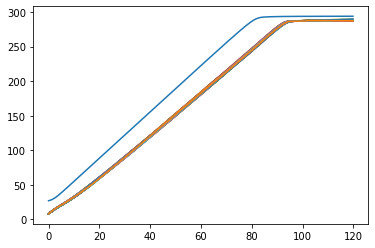

In [6]:
import matplotlib.pyplot as plt
from trajectory_functions import *

# create idm data for one set of fixed parameters and 2 cars
a_in = 0.73            # acceleration
b_in = 1.67            # comfortable deceleration
T_in = 1.6             # safe time gap
v0_in = 120/36         # desired speed
l_in = 4               # average length of car
s0_in = 2              # jam distance
s1_in = 3              # jam distance nonlinear
# delt = 4            # acceleration exponent

n = 2
dt = 0.2
endtime = 120
nState = 3

tspan = np.arange(0, endtime, dt)
num_traj_points = len(tspan)

y0_true = [21+(s0+l), 30/36]
leader_traj = get_lead_traj(y0_true, n, a, b, T, v0, l, s0, s1, delt, num_traj_points, dt)

nExpTraj = 100
nSimTraj = 100
follow_inits = get_initial_state(nExpTraj, s0,l)

follow_exp_trajs = np.zeros((nExpTraj, num_traj_points, 3))
follow_sim_trajs = []
for nn in range(nExpTraj):
    print('exp: {n}'.format(n=nn))
    a, b, T, v0, l, s0, s1, delt = get_driver_idm_params(a_in, b_in, T_in, v0_in, l_in, s0_in, s1_in)
    follow_exp_trajs[nn] = get_follow_traj(follow_inits[nn,:], leader_traj, n,a,b,T,v0,l,s0,s1,delt,num_traj_points, dt)
    
    sim_store = np.zeros((nSimTraj, num_traj_points, 3))
    for mm in range(nSimTraj):
        sim_store[mm] = get_follow_traj(follow_inits[nn,:], leader_traj, n,a,b,T,v0,l,s0,s1,delt,num_traj_points, dt)
    follow_sim_trajs.append(sim_store)


plt.plot(tspan, leader_traj[:,0])
plt.plot(tspan, follow_exp_trajs[0,:,0])
for nn in range(nSimTraj):
    plt.plot(tspan, follow_sim_trajs[0][nn, :, 0])

plt.show()

In [ ]:
import math
def feature_expectation(trajectories, leader_pos, v0, d0):
    '''
    Returns the feauture expectation of all given trajectories. Features are:
    risk of collision, deviation from comfortable following distance, 
    deviation from desired velocity, velocity, and acceleration effort.

    Input: 
    trajectories : matrix of trajectories (number of trajectories x trajectory length x number of state elements)
        - trajectory states are ego vehicle [pos; vel; accleration]
    leader_pos : trajectory of leader posistion
    v0 : desired velocity
    d0 : comfortable following distance

    Output: 
    exp_feat_lst : matrix of expected feature values for each trajectory
    (number of trajectories x number of feature elements (2))
    '''

    nFeat = 5                         # number of features 
    nTraj = len(trajectories)         # number of trajectories in the trajectories matrix
    traj_len = len(trajectories[0])   # length of each trajectory

    feat_lst = np.zeros((nTraj, nFeat))
    for nn in range(nTraj):
        feat_nn = np.zeros(nFeat)              # vector for feature summation

        # iterate through the states in the trajectory and compute feature at 
        # each state
        for tt in range(traj_len):

            ego_pos = trajectories[nn][tt][0]
            ego_vel = trajectories[nn][tt][1]
            ego_acc = trajectories[nn][tt][2]

            follow_dist = leader_pos[tt] - ego_pos
            coll_risk = math.exp(- follow_dist / ego_vel) # if estimated time to collision small, bad, if estimated time to collision large good
            vel_err = (v0 - ego_vel)**2                   # if velocity too far away from desired, bad
            dist_err = math.exp(-abs(follow_dist - d0))   # if following distance greater than comfortable, good, if less, bad 

            feat_nn = np.add([coll_risk, dist_err, vel_err, ego_vel, ego_acc**2], feat_nn)

        feat_lst[nn,:] = feat_nn / max(feat_nn)


    return feat_lst

In [62]:
# MaxEnt IRL
nState = 3
nFeat = 5

v_des = v0_in
d_des = s0_in

# Get feature expectations over all expert and sim. trajectories
# compute expert trajectory feature expectation
expert_feat_exp =  feature_expectation(follow_exp_trajs, leader_traj[:,0], v_des, d_des)
expert_feat_total = np.ndarray.sum(expert_feat_exp, axis=0)

sim_feat_all = []
for nn in range(nExpTraj):
  # compute expected feature vector of each simulated trajectory
  sim_feat_lst = feature_expectation(follow_sim_trajs[nn], leader_traj[:,0], v_des, d_des)
  sim_feat_all.append(sim_feat_lst)

Training Epoch: 0
Training Epoch: 100
Training Epoch: 200
Training Epoch: 300
Training Epoch: 400
Training Epoch: 500
Training Epoch: 600
Training Epoch: 700
Training Epoch: 800
Training Epoch: 900
Training Epoch: 1000
Training Epoch: 1100
Training Epoch: 1200
Training Epoch: 1300
Training Epoch: 1400
Training Epoch: 1500
Training Epoch: 1600
Training Epoch: 1700
Training Epoch: 1800
Training Epoch: 1900
Training Epoch: 2000
Training Epoch: 2100
Training Epoch: 2200
Training Epoch: 2300
Training Epoch: 2400
Training Epoch: 2500
Training Epoch: 2600
Training Epoch: 2700
Training Epoch: 2800
Training Epoch: 2900
Training Epoch: 3000
Training Epoch: 3100
Training Epoch: 3200
Training Epoch: 3300
Training Epoch: 3400
Training Epoch: 3500
Training Epoch: 3600
Training Epoch: 3700
Training Epoch: 3800
Training Epoch: 3900
Training Epoch: 4000
Training Epoch: 4100
Training Epoch: 4200
Training Epoch: 4300
Training Epoch: 4400
Training Epoch: 4500
Training Epoch: 4600
Training Epoch: 4700
Trai

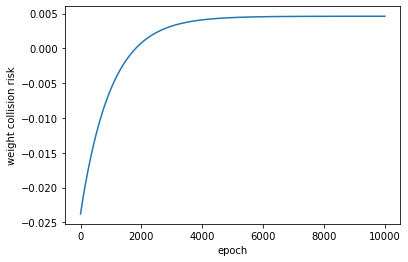

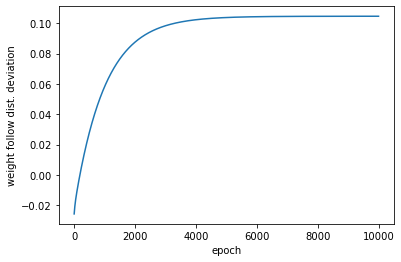

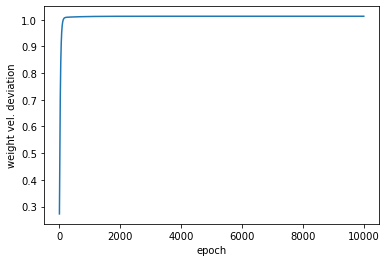

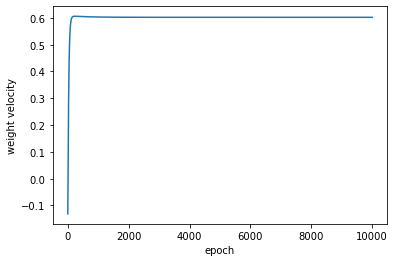

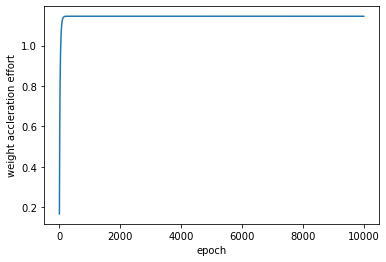

In [65]:
E = 10000            # training epochs
alpha = 0.05
lamb = 0.01          # regularization parameter

# init weights vector
omega = np.random.multivariate_normal(np.zeros((nFeat)), np.eye(nFeat) * 0.05)
omega_vec = np.zeros((E, nFeat))

# loop through training epochs
for ee in range(E):
    if ee % 100 == 0:
        print("Training Epoch: {e}".format(e=ee))
    
    sim_feat_total = np.zeros(nFeat)  # initialize feature expectation of all simulated trajectories 

    # loop through the human trajectories
    for nn in range(nExpTraj):
        sim_feat_lst = sim_feat_all[nn] 

        # compute the denominator for the trajectory probability 
        jj_sum_denominator = 0
        for jj in range(len(sim_feat_lst)):
            feat_exp_jj = sim_feat_lst[jj]
            jj_sum_denominator += np.exp(np.matmul(omega, feat_exp_jj))

        # compute interior sum (sum over simulated trajectories corresponding to expert traj. nn)
        jj_sum = np.zeros(nFeat)
        for jj in range(len(sim_feat_lst)):
            feat_exp_jj = sim_feat_lst[jj]
            jj_sum = np.add(jj_sum, (np.exp(np.matmul(omega, feat_exp_jj)) / jj_sum_denominator) * feat_exp_jj)

        # add into sum over all expert trajectories
        sim_feat_total = np.add(jj_sum, sim_feat_total)

    # calculate gradient and update
    grad = expert_feat_total - sim_feat_total - 2*lamb*omega
    omega = omega + alpha * grad
    omega_vec[ee,:] = omega


# plot the feature weights
plt.plot(np.arange(0,E), omega_vec[:,0])
plt.xlabel('epoch')
plt.ylabel('weight collision risk')
plt.show()
plt.plot(np.arange(0,E), omega_vec[:,1])
plt.xlabel('epoch')
plt.ylabel('weight follow dist. deviation')  
plt.show()
plt.plot(np.arange(0,E), omega_vec[:,2])
plt.xlabel('epoch')
plt.ylabel('weight vel. deviation')  
plt.show()
plt.plot(np.arange(0,E), omega_vec[:,3])
plt.xlabel('epoch')
plt.ylabel('weight velocity')  
plt.show()
plt.plot(np.arange(0,E), omega_vec[:,4])
plt.xlabel('epoch')
plt.ylabel('weight accleration effort')  
plt.show()

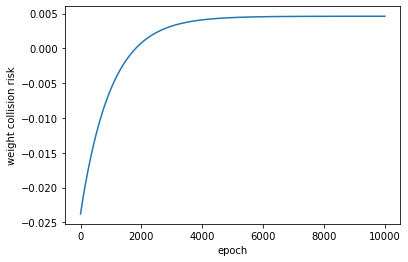

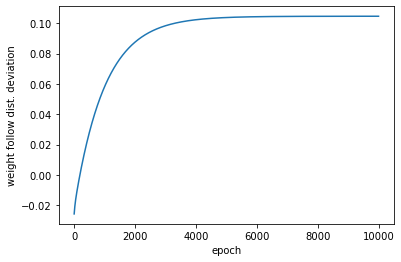

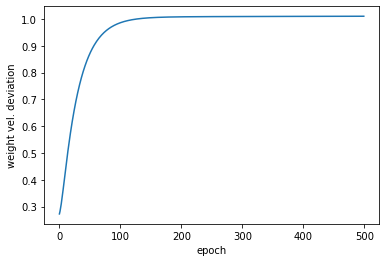

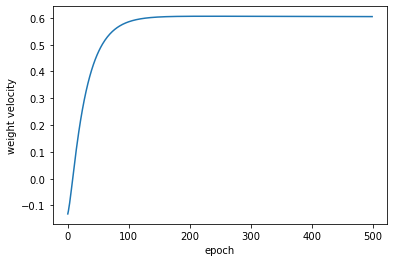

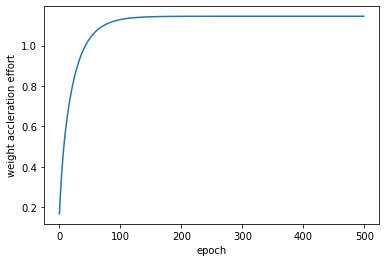

In [68]:
# plot the feature weights
plt.plot(np.arange(0,E), omega_vec[:,0])
plt.xlabel('epoch')
plt.ylabel('weight collision risk')
plt.show()
plt.plot(np.arange(0,E), omega_vec[:,1])
plt.xlabel('epoch')
plt.ylabel('weight follow dist. deviation')  
plt.show()
plt.plot(np.arange(0,500), omega_vec[0:500,2])
plt.xlabel('epoch')
plt.ylabel('weight vel. deviation')  
plt.show()
plt.plot(np.arange(0,500), omega_vec[:500,3])
plt.xlabel('epoch')
plt.ylabel('weight velocity')  
plt.show()
plt.plot(np.arange(0,500), omega_vec[:500,4])
plt.xlabel('epoch')
plt.ylabel('weight accleration effort')  
plt.show()

In [69]:
omega

array([0.00460982, 0.10458958, 1.01308511, 0.60203562, 1.14491395])

In [194]:
def feature_expectation_single(state, leader_pos, v0, d0):
    '''
    Returns the feauture expectation of all given trajectories. Features are:
    risk of collision, deviation from comfortable following distance, 
    deviation from desired velocity, velocity, and acceleration effort.

    Input: 
    trajectories : matrix of trajectories (number of trajectories x trajectory length x number of state elements)
        - trajectory states are ego vehicle [pos; vel; accleration]
    leader_pos : trajectory of leader posistion
    v0 : desired velocity
    d0 : comfortable following distance

    Output: 
    exp_feat_lst : matrix of expected feature values for each trajectory
    (number of trajectories x number of feature elements (2))
    '''

    nFeat = 5                         # number of features 
    feat_nn = np.zeros(nFeat)

    ego_pos = state[0]
    ego_vel = state[1]
    ego_acc = state[2]

    follow_dist = leader_pos - ego_pos
    # print(follow_dist)
    # print(ego_vel)
    coll_risk = math.exp(- follow_dist / ego_vel) # if estimated time to collision small, bad, if estimated time to collision large good
    vel_err = (v0 - ego_vel)**2                   # if velocity too far away from desired, bad
    dist_err = math.exp(-abs(follow_dist - d0))   # if following distance greater than comfortable, good, if less, bad 

    feat_nn = np.array([coll_risk, dist_err, vel_err, ego_vel, ego_acc**2])


    return feat_nn / max(feat_nn)

In [249]:
import scipy

# define acceleration bins
temp = 1
bin_size = 0.1
accel_bins = np.arange(-9.95, 9.95, bin_size)

learned_traj = np.zeros((num_traj_points, nState))
learned_traj[0][:] = follow_inits[0]
curr_state = follow_inits[0]

for t in range(1, num_traj_points):

    # evalute the bins
    bin_probs = np.zeros(len(accel_bins))
    for aa, a in enumerate(accel_bins):
        state_test = curr_state.copy()
        state_test[2] = a

        feat_exp = feature_expectation_single(state_test, leader_traj[t][0], v_des, d_des)
        bin_probs[aa] = math.exp(temp * np.matmul(omega, feat_exp))
    bin_probs = bin_probs / sum(bin_probs)

    a_ind = np.argmin(bin_probs)
    a_mid_chosen = accel_bins[a_ind]
    a_chosen = np.random.uniform(a_mid_chosen - bin_size/2, a_mid_chosen + bin_size/2)
    
    next_state = np.zeros(nState)
    next_state[0] = curr_state[0] + dt * curr_state[1]
    next_state[1] = curr_state[1] + dt * a_chosen
    next_state[2] = a_chosen
    
    learned_traj[t][:] = next_state
    curr_state = next_state.copy()
    
        

In [256]:
# define acceleration bins
temp = 0.5
bin_size = 0.1
accel_bins = np.arange(-9.95, 9.95, bin_size)

learned_traj_pt5 = np.zeros((num_traj_points, nState))
learned_traj_pt5[0][:] = follow_inits[0]
curr_state = follow_inits[0]

for t in range(1, num_traj_points):

    # evalute the bins
    bin_probs = np.zeros(len(accel_bins))
    for aa, a in enumerate(accel_bins):
        state_test = curr_state.copy()
        state_test[2] = a

        feat_exp = feature_expectation_single(state_test, leader_traj[t][0], v_des, d_des)
        bin_probs[aa] = math.exp(temp * np.matmul(omega, feat_exp))
    bin_probs = bin_probs / sum(bin_probs)

    a_ind = np.argmin(bin_probs)
    a_mid_chosen = accel_bins[a_ind]
    a_chosen = np.random.uniform(a_mid_chosen - bin_size/2, a_mid_chosen + bin_size/2)
    
    next_state = np.zeros(nState)
    next_state[0] = curr_state[0] + dt * curr_state[1]
    next_state[1] = curr_state[1] + dt * a_chosen
    next_state[2] = a_chosen
    
    learned_traj_pt5[t][:] = next_state
    curr_state = next_state.copy()
    

In [258]:
# define acceleration bins
temp = 0.1
bin_size = 0.1
accel_bins = np.arange(-9.95, 9.95, bin_size)

learned_traj_pt1 = np.zeros((num_traj_points, nState))
learned_traj_pt1[0][:] = follow_inits[0]
curr_state = follow_inits[0]

for t in range(1, num_traj_points):

    # evalute the bins
    bin_probs = np.zeros(len(accel_bins))
    for aa, a in enumerate(accel_bins):
        state_test = curr_state.copy()
        state_test[2] = a

        feat_exp = feature_expectation_single(state_test, leader_traj[t][0], v_des, d_des)
        bin_probs[aa] = math.exp(temp * np.matmul(omega, feat_exp))
    bin_probs = bin_probs / sum(bin_probs)

    a_ind = np.argmin(bin_probs)
    a_mid_chosen = accel_bins[a_ind]
    a_chosen = np.random.uniform(a_mid_chosen - bin_size/2, a_mid_chosen + bin_size/2)
    
    next_state = np.zeros(nState)
    next_state[0] = curr_state[0] + dt * curr_state[1]
    next_state[1] = curr_state[1] + dt * a_chosen
    next_state[2] = a_chosen
    
    learned_traj_pt1[t][:] = next_state
    curr_state = next_state.copy()

In [260]:
# define acceleration bins
temp = 0.05
bin_size = 0.1
accel_bins = np.arange(-9.95, 9.95, bin_size)

learned_traj_pt05 = np.zeros((num_traj_points, nState))
learned_traj_pt05[0][:] = follow_inits[0]
curr_state = follow_inits[0]

for t in range(1, num_traj_points):

    # evalute the bins
    bin_probs = np.zeros(len(accel_bins))
    for aa, a in enumerate(accel_bins):
        state_test = curr_state.copy()
        state_test[2] = a

        feat_exp = feature_expectation_single(state_test, leader_traj[t][0], v_des, d_des)
        bin_probs[aa] = math.exp(temp * np.matmul(omega, feat_exp))
    bin_probs = bin_probs / sum(bin_probs)

    a_ind = np.argmin(bin_probs)
    a_mid_chosen = accel_bins[a_ind]
    a_chosen = np.random.uniform(a_mid_chosen - bin_size/2, a_mid_chosen + bin_size/2)
    
    next_state = np.zeros(nState)
    next_state[0] = curr_state[0] + dt * curr_state[1]
    next_state[1] = curr_state[1] + dt * a_chosen
    next_state[2] = a_chosen
    
    learned_traj_pt05[t][:] = next_state
    curr_state = next_state.copy()

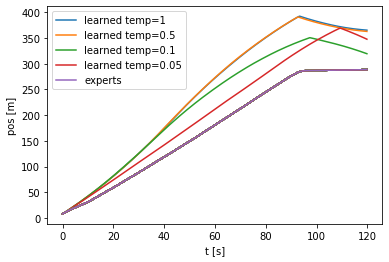

In [261]:
plt.plot(tspan, learned_traj[:,0], label='learned temp=1')
plt.plot(tspan, learned_traj_pt5[:,0], label='learned temp=0.5')
plt.plot(tspan, learned_traj_pt1[:,0], label='learned temp=0.1')
plt.plot(tspan, learned_traj_pt05[:,0], label='learned temp=0.05')
for nn in range(nExpTraj):
    plt.plot(tspan, follow_exp_trajs[i][:,0])
    if nn == nExpTraj - 1:
        plt.plot(tspan, follow_exp_trajs[i][:,0], label='experts')
plt.xlabel('t [s]')
plt.ylabel('pos [m]')
plt.legend()
plt.show()

In [264]:
np.savetxt("leader.csv", leader_traj, delimiter=",")